In [21]:
# Assessing Melbourne's Employment and Housing Correlations
# Python Code by Patrick Tjahjadi (890003)

# ----- Imported Libraries -----
# Pandas: required for DataFrame implementation
import pandas as pd
from pandas.plotting import parallel_coordinates
# Matplotlib: required for plotting visualisations
import matplotlib.pyplot as plt
# Numpy: required for VAT algorithm and regression line
import numpy as np
# Scipy: required for calculating Pearson coefficient, p-value and VAT algorithm
from scipy.stats.stats import pearsonr
from scipy.spatial.distance import pdist, squareform
# Re and Decimal: required for seperating dollar signs and thousand separators
from re import sub
from decimal import Decimal
# Seaborn: required for plotting the VAT visualisation
import seaborn as sns
# -------------------------------

# Define years and sectors covered, and read csv file.
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
num_years = 15
sectors = ['Business Sector', 'Public Services Sector', 'IT Sector', 'Housing Sector', 'Operations Sector', 'Others Sector']
houseprice = pd.read_csv('Median_House_Prices_-_By_Type_and_Sale_Year.csv', encoding ='ISO-8859-1')
employment = pd.read_csv('Employment_by_block_by_industry.csv', encoding='ISO-8859-1')
# Define list of colours for each year to be plotted.
year_color = ['green', 'red', 'blue', 'gray', 'orange', 'black', 'purple', 'aquamarine', 'yellow', 'brown', 'pink', 'violet',
         'salmon', 'magenta', 'gold']

In [3]:
# Method 1: Gather total number of people employed in each industry for each year from 2002 to 2016 
# (Method description in the Pre-processing section of the report)
total_employment_per_year =  [0] * 15
accommodation_per_year = [0] * 15
admin_per_year = [0] * 15
agriculture_per_year = [0] * 15
arts_per_year = [0] * 15
business_per_year = [0] * 15
construction_per_year = [0] * 15
education_per_year = [0] * 15
electricity_per_year = [0] * 15
finance_per_year = [0] * 15
food_per_year = [0] * 15
health_per_year = [0] * 15
information_per_year = [0] * 15
manufacturing_per_year = [0] * 15
other_per_year = [0] * 15
publicadmin_per_year = [0] * 15
realestate_per_year = [0] * 15
rental_per_year = [0] * 15
retail_per_year = [0] * 15
transport_per_year = [0] * 15
wholesale_per_year = [0] * 15


for i in range(len(employment)):
    if (employment["CLUE small area"][i] == "City of Melbourne (total)"):
        total_employment_per_year[int(employment["Census year"][i])-2002] += int(employment["Total employment in block"][i].replace(',' , ''))
        accommodation_per_year[int(employment["Census year"][i])-2002] += int(employment["Accommodation"][i].replace(',',''))
        admin_per_year[int(employment["Census year"][i])-2002] += int(employment["Admin and Support Services"][i].replace(',',''))
        agriculture_per_year[int(employment["Census year"][i])-2002] += int(employment["Agriculture and Mining"][i].replace(',',''))
        arts_per_year[int(employment["Census year"][i])-2002] += int(employment["Arts and Recreation Services"][i].replace(',',''))
        business_per_year[int(employment["Census year"][i])-2002] += int(employment["Business Services"][i].replace(',',''))
        construction_per_year[int(employment["Census year"][i])-2002] += int(employment["Construction"][i].replace(',',''))
        education_per_year[int(employment["Census year"][i])-2002] += int(employment["Education and Training"][i].replace(',',''))
        electricity_per_year[int(employment["Census year"][i])-2002] += int(employment["Electricity, Gas, Water and Waste Services"][i].replace(',',''))
        finance_per_year[int(employment["Census year"][i])-2002] += int(employment["Finance and Insurance"][i].replace(',',''))
        food_per_year[int(employment["Census year"][i])-2002] += int(employment["Food and Beverage Services"][i].replace(',',''))
        health_per_year[int(employment["Census year"][i])-2002] += int(employment["Health Care and Social Assistance"][i].replace(',',''))
        information_per_year[int(employment["Census year"][i])-2002] += int(employment["Information Media and Telecommunications"][i].replace(',',''))
        manufacturing_per_year[int(employment["Census year"][i])-2002] += int(employment["Manufacturing"][i].replace(',',''))
        other_per_year[int(employment["Census year"][i])-2002] += int(employment["Other Services"][i].replace(',',''))
        publicadmin_per_year[int(employment["Census year"][i])-2002] += int(employment["Public Administration and Safety"][i].replace(',',''))
        realestate_per_year[int(employment["Census year"][i])-2002] += int(employment["Real Estate Services"][i].replace(',',''))
        rental_per_year[int(employment["Census year"][i])-2002] += int(employment["Rental and Hiring Services"][i].replace(',',''))
        retail_per_year[int(employment["Census year"][i])-2002] += int(employment["Retail Trade"][i].replace(',',''))
        transport_per_year[int(employment["Census year"][i])-2002] += int(employment["Transport, Postal and Storage"][i].replace(',',''))
        wholesale_per_year[int(employment["Census year"][i])-2002] += int(employment["Wholesale Trade"][i].replace(',',''))


In [4]:
# List house and apartment prices for each year from 2002 to 2016
total_house_price_per_year = [0] * 15
total_apartment_price_per_year = [0] * 15
for i in range(4, len(houseprice)):
    if (houseprice["Type"][i] == "House/Townhouse"):
        total_house_price_per_year[houseprice["Sale_Year"][i]-2002] = houseprice["Median_Price"][i]
    else:
        total_apartment_price_per_year[houseprice["Sale_Year"][i]-2002] = houseprice["Median_Price"][i]


In [5]:
# Division of Sectors:
# Business = Business Services + Finance and Insurance + Retail Trade + Wholesale Trade
# Public Services = Education and Training + Electricity + Health Care + Public Admin 
# IT Services = Admin and Support Services + Information Media and Tele 
# Housing = Accomodation + Real Estate 
# Operations = Construction + Manufacturing + Rental and Hiring + Transport, Postal and Storage
# Others = Arts + Agriculture + Food + Other

total_business_sector = [0] * 15
total_public_services_sector = [0] * 15
total_it_sector = [0] * 15
total_housing_sector = [0] * 15
total_operations_sector = [0] * 15
total_others_sector = [0] * 15

for i in range(len(retail_per_year)):
    total_business_sector[i] += (business_per_year[i] + finance_per_year[i] + retail_per_year[i] + wholesale_per_year[i])
    total_public_services_sector[i] += (education_per_year[i] + electricity_per_year[i] + health_per_year[i] + publicadmin_per_year[i])
    total_it_sector[i] += (admin_per_year[i] + information_per_year[i])
    total_housing_sector[i] += (accommodation_per_year[i] + realestate_per_year[i])
    total_operations_sector[i] += (construction_per_year[i] + manufacturing_per_year[i] + rental_per_year[i] + transport_per_year[i])
    total_others_sector[i] += (arts_per_year[i] + agriculture_per_year[i] + food_per_year[i] + other_per_year[i])
    
# List the number of people employed for each sector per year.
list2002 = [total_business_sector[0], total_public_services_sector[0], total_it_sector[0], total_housing_sector[0], total_operations_sector[0], total_others_sector[0]]
list2003 = [total_business_sector[1], total_public_services_sector[1], total_it_sector[1], total_housing_sector[1], total_operations_sector[1], total_others_sector[1]]
list2004 = [total_business_sector[2], total_public_services_sector[2], total_it_sector[2], total_housing_sector[2], total_operations_sector[2], total_others_sector[2]]
list2005 = [total_business_sector[3], total_public_services_sector[3], total_it_sector[3], total_housing_sector[3], total_operations_sector[3], total_others_sector[3]]
list2006 = [total_business_sector[4], total_public_services_sector[4], total_it_sector[4], total_housing_sector[4], total_operations_sector[4], total_others_sector[4]]
list2007 = [total_business_sector[5], total_public_services_sector[5], total_it_sector[5], total_housing_sector[5], total_operations_sector[5], total_others_sector[5]]
list2008 = [total_business_sector[6], total_public_services_sector[6], total_it_sector[6], total_housing_sector[6], total_operations_sector[6], total_others_sector[6]]
list2009 = [total_business_sector[7], total_public_services_sector[7], total_it_sector[7], total_housing_sector[7], total_operations_sector[7], total_others_sector[7]]
list2010 = [total_business_sector[8], total_public_services_sector[8], total_it_sector[8], total_housing_sector[8], total_operations_sector[8], total_others_sector[8]]
list2011 = [total_business_sector[9], total_public_services_sector[9], total_it_sector[9], total_housing_sector[9], total_operations_sector[9], total_others_sector[9]]
list2012 = [total_business_sector[10], total_public_services_sector[10], total_it_sector[10], total_housing_sector[10], total_operations_sector[10], total_others_sector[10]]
list2013 = [total_business_sector[11], total_public_services_sector[11], total_it_sector[11], total_housing_sector[11], total_operations_sector[11], total_others_sector[11]]
list2014 = [total_business_sector[12], total_public_services_sector[12], total_it_sector[12], total_housing_sector[12], total_operations_sector[12], total_others_sector[12]]
list2015 = [total_business_sector[13], total_public_services_sector[13], total_it_sector[13], total_housing_sector[13], total_operations_sector[13], total_others_sector[13]]
list2016 = [total_business_sector[14], total_public_services_sector[14], total_it_sector[14], total_housing_sector[14], total_operations_sector[14], total_others_sector[14]]


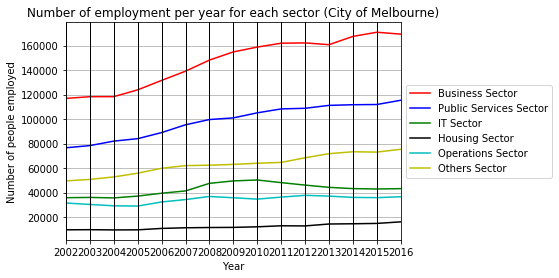

In [6]:
# Parallel Coordinates on the number of employment per year for each sector
employment_dataframe = pd.DataFrame({'2002': list2002, '2003': list2003, '2004': list2004,
                                '2005': list2005, '2006': list2006, '2007': list2007,
                                '2008': list2008, '2009': list2009, '2010': list2010,
                                '2011': list2011, '2012': list2012, '2013': list2013,
                                '2014': list2014, '2015': list2015, '2016': list2016, 'Sectors': sectors})

parallel_coordinates(employment_dataframe[['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012'
                                       ,'2013','2014','2015','2016', 'Sectors']], "Sectors", color=["r", "b", 'g', 'k', 'c', 'y'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Number of employment per year for each sector (City of Melbourne)")
plt.ylabel('Number of people employed')
plt.xlabel('Year')
plt.rcParams['figure.figsize'] = (8.5,4)


In [7]:
# Method 2: Gather all instances of the number of people employed in each sector per block and year

# First, find the size required for the array
sector_array_size = 1

for i in range(len(employment)):
    if (employment["CLUE small area"][i] != "City of Melbourne (total)"):
        sector_array_size += 1

business_sector = [0] * sector_array_size
public_services_sector = [0] * sector_array_size
it_sector = [0] * sector_array_size
housing_sector = [0] * sector_array_size
operations_sector = [0] * sector_array_size
others_sector = [0] * sector_array_size

# Second, split into employment sectors and list them
for i in range(len(employment)):
    if (employment["CLUE small area"][i] != "City of Melbourne (total)"):
        business_sector[i] += (int(employment["Business Services"][i].replace(',','')) + int(employment["Finance and Insurance"][i].replace(',',''))
                              + int(employment["Retail Trade"][i].replace(',','')) + int(employment["Wholesale Trade"][i].replace(',','')))

        public_services_sector[i] += (int(employment["Education and Training"][i].replace(',','')) + int(employment["Electricity, Gas, Water and Waste Services"][i].replace(',',''))
                                + int(employment["Health Care and Social Assistance"][i].replace(',','')) + int(employment["Public Administration and Safety"][i].replace(',','')))

        it_sector[i] += (int(employment["Admin and Support Services"][i].replace(',','')) + int(employment["Information Media and Telecommunications"][i].replace(',','')))

        housing_sector[i] += (int(employment["Accommodation"][i].replace(',',''))+ int(employment["Real Estate Services"][i].replace(',','')))

        operations_sector[i] += (int(employment["Construction"][i].replace(',','')) + int(employment["Manufacturing"][i].replace(',','')) + int(employment["Rental and Hiring Services"][i].replace(',',''))
                            + int(employment["Transport, Postal and Storage"][i].replace(',','')))

        others_sector[i] += (int(employment["Arts and Recreation Services"][i].replace(',','')) + int(employment["Agriculture and Mining"][i].replace(',','')) 
                        + int(employment["Food and Beverage Services"][i].replace(',','')) + int(employment["Other Services"][i].replace(',','')))


In [8]:
# Find the average price of house and apartment for each year
average_price_per_year = [0] * 15
for i in range(len(average_price_per_year)):
    # Remove dollar sign and thousand seperators for arithmetic operations and change the variables into
    # floating point form. Use try except TypeError to prevent an error in case of running more than once
    try:
        apartment_price = Decimal(sub(r'[^\d.]', '', total_apartment_price_per_year[i]))
        house_price = Decimal(sub(r'[^\d.]', '', total_house_price_per_year[i]))
        total_apartment_price_per_year[i] = float(apartment_price)
        total_house_price_per_year[i] = float(house_price)
        average_price_per_year[i] += (apartment_price + house_price)/2
        average_price_per_year[i] = float(average_price_per_year[i])
    except TypeError:
        pass


In [9]:
# Calculate the Pearson correlation coefficient and the associated
# p-value between property and number of employment per year.
[pearson_avg_vs_employment, pval_avg_vs_employment] = pearsonr(average_price_per_year, total_employment_per_year)
pearson_avg_vs_employment = round(pearson_avg_vs_employment, 3)

[pearson_house_vs_employment, pval_house_vs_employment] = pearsonr(total_house_price_per_year, total_employment_per_year)
pearson_house_vs_employment = round(pearson_house_vs_employment, 3)

[pearson_apartment_vs_employment, pval_apartment_vs_employment] = pearsonr(total_apartment_price_per_year, total_employment_per_year)
pearson_apartment_vs_employment = round(pearson_apartment_vs_employment, 3)


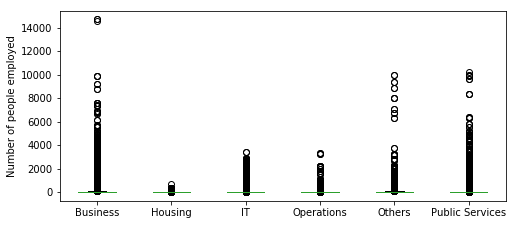

In [10]:
# Box plot of the instances of people employed in each sector
sector_dataframe = pd.DataFrame({'Business': business_sector, 'Public Services': public_services_sector,
                                'IT': it_sector, 'Housing': housing_sector,
                                'Operations': operations_sector, 'Others': others_sector})
plt.rcParams['figure.figsize'] = (8,3.5)
sector_dataframe.plot(kind='box')
plt.ylabel('Number of people employed')
plt.show()


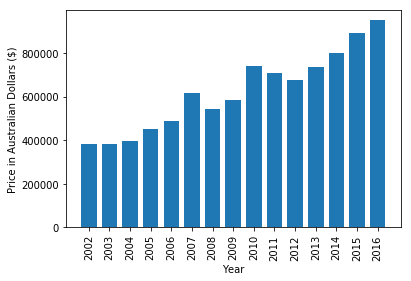

In [11]:
# Bar chart of the price of houses in Melbourne from 2002 to 2016
plt.rcParams['figure.figsize'] = (6,4)
plt.bar(years, total_house_price_per_year,  0.75)
plt.xticks(years, rotation='vertical')
plt.ylabel('Price in Australian Dollars ($)')
plt.xlabel('Year')
plt.show()


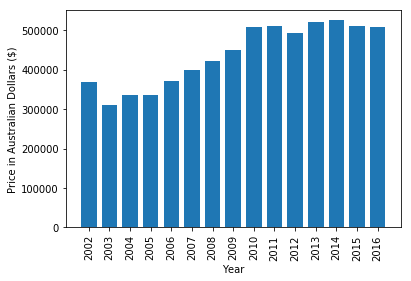

In [12]:
# Bar chart of the price of apartments in Melbourne from 2002 to 2016
plt.bar(years, total_apartment_price_per_year,  0.75)
plt.xticks(years, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Price in Australian Dollars ($)')
plt.show()


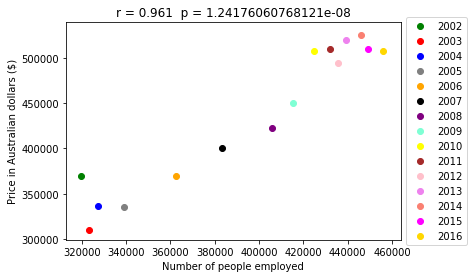

In [46]:
# Scatter plot of the number of people employed vs apartment prices for each year
price_vs_employment_dataframe = pd.DataFrame({'Num_Employment': total_employment_per_year,
                                 'House_Price': total_house_price_per_year,
                                 'Apartment_Price': total_apartment_price_per_year})
for i in range(num_years):
    plt.scatter(price_vs_employment_dataframe.iloc[i, 2], price_vs_employment_dataframe.iloc[i, 0],
                color = year_color[i], label = years[i])
plt.xlabel('Number of people employed')
plt.ylabel('Price in Australian dollars ($)')
# Display Pearson coefficient and p-value for the title
plt.title("r = "+ str(pearson_apartment_vs_employment) + "  p = " + str(pval_apartment_vs_employment))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


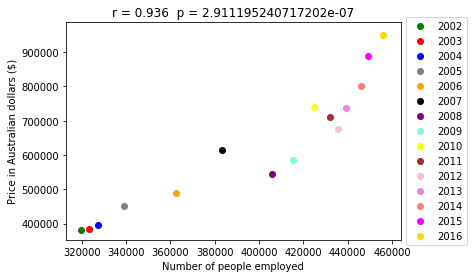

In [23]:
# Scatter plot of the number of people employed vs house prices for each year

for i in range(num_years):
    plt.scatter(price_vs_employment_dataframe.iloc[i, 2], price_vs_employment_dataframe.iloc[i, 1],
                color = year_color[i], label= years[i])
plt.xlabel('Number of people employed')
plt.ylabel('Price in Australian dollars ($)')
# Display Pearson coefficient and p-value for the title
plt.title("r = "+ str(pearson_house_vs_employment) + "  p = " + str(pval_house_vs_employment))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


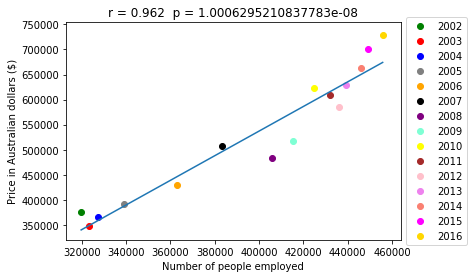

In [41]:
# Scatter plot of the number of people employed vs average property price for each year
average_price_per_year2 = pd.DataFrame({'Average_Price': average_price_per_year,
                                       'Num_Employed': total_employment_per_year})
for i in range(num_years):
    plt.scatter(average_price_per_year2.iloc[i, 1], average_price_per_year2.iloc[i, 0],
            color = year_color[i], label= years[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Plot line of best fit to check correlation for the scatter plot
z = np.polyfit(x = average_price_per_year2.iloc[:,1], y = average_price_per_year2.iloc[:,0], deg = 1)
p = np.poly1d(x)
plt.plot(average_price_per_year2['Num_Employed'], p(average_price_per_year2['Num_Employed']))
# Display Pearson coefficient and p-value for the title
plt.title("r = "+ str(pearson_avg_vs_employment) + "  p = " + str(pval_avg_vs_employment))
plt.xlabel('Number of people employed')
plt.ylabel('Price in Australian dollars ($)')
plt.show()


In [17]:
# Print the percentage increase in employment and property prices from 2002 to 2016
employment_increase = total_employment_per_year[14]/total_employment_per_year[0]
property_increase = average_price_per_year[14]/average_price_per_year[0]

employment_increase = round(employment_increase*100, 2)
property_increase = round(property_increase*100, 2)

print(employment_increase)
print(property_increase)


142.54
194.14


In [18]:
# Normalise the values of all employment sectors for the VAT visualisation
normalised_business_sector = []
normalised_public_services_sector = []
normalised_it_sector = []
normalised_operations_sector = []
normalised_housing_sector = []
normalised_others_sector = []

for i in range(sector_array_size):
    normalised_business_sector.append((business_sector[i] - min(business_sector)) / (max(business_sector)-min(business_sector)))
    normalised_public_services_sector.append((public_services_sector[i] - min(public_services_sector)) / (max(public_services_sector)-min(public_services_sector)))
    normalised_it_sector.append((it_sector[i] - min(it_sector)) / (max(it_sector)-min(it_sector)))
    normalised_operations_sector.append((operations_sector[i] - min(operations_sector)) / (max(operations_sector)-min(operations_sector)))
    normalised_housing_sector.append((housing_sector[i] - min(housing_sector)) / (max(housing_sector)-min(housing_sector)))
    normalised_others_sector.append((others_sector[i] - min(others_sector)) / (max(others_sector)-min(others_sector)))


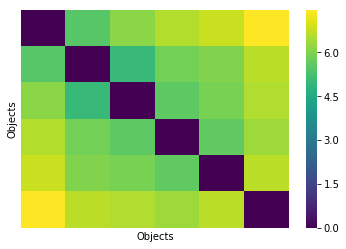

In [19]:
def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I

# Plot the VAT visualisation here

sectors = [normalised_business_sector, normalised_public_services_sector, normalised_it_sector, normalised_housing_sector, normalised_operations_sector, normalised_others_sector]

RV, C, I = VAT(sectors)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()
